In [1]:
cd E:/GitHub/computervision

E:\GitHub\computervision


In [2]:
import pandas as pd
import numpy as np
import os
import shutil

In [3]:
dataset_path = 'E:/Datasets/cor-splits'
images_path = 'E:/GitHub/octa-flood-images/data/images'

In [4]:
df = pd.read_csv('data/images_lite.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354192 entries, 0 to 354191
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   code       354192 non-null  float64
 1   file_name  354192 non-null  object 
 2   file_path  354192 non-null  object 
 3   seen       354192 non-null  bool   
 4   tags       354192 non-null  object 
 5   flood      354192 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 13.8+ MB


In [5]:
# for st in df.set.unique():
#     print(f"{st} set: \n{df[df.set == st].code.unique()}\n")
# balanced_train = df[df.set == 'train'].code.unique()
# balanced_test = df[df.set == 'test'].code.unique()
# balanced_val = df[df.set == 'val'].code.unique()

In [6]:
# def binarize_tag(tags, cls_1_tags):
#     if tags is None:
#         return 0
#     for tag in cls_1_tags:
#         if tag in tags:
#             return 1
#     return 0

# cls_1_tags = ['alagamento', 'bolsão', 'lâmina', 'poça', 'transbordo']
# df['flood'] = df['tags'].apply(lambda tags: binarize_tag(tags, cls_1_tags))
# df.info()

In [7]:
df_filter = df.copy()
codes = df.code.unique()

for cd in codes:
    if df_filter[(df_filter.code == cd) & (df_filter.flood == 0)].shape[0] == 0 or df_filter[(df_filter.code == cd) & (df_filter.flood == 1)].shape[0] == 0:
        df_filter = df_filter[df_filter.code != cd]
len(df_filter.code.unique())

123

In [8]:
from matplotlib import pyplot as plt
def report_class_count_per_group(Y, groups):
    cnt_0 = groups[Y == 0.0].value_counts()
    cnt_1 = groups[Y == 1.0].value_counts()
    cnt_0 = cnt_0.loc[cnt_1.index].sort_values(ascending=False)
    code_class_cnt = pd.concat([cnt_0.rename('class 0'), cnt_1.rename('class 1')], axis=1)
    display(code_class_cnt.T)
    
    fig = plt.figure(figsize=(7, 2.5))
    ax = fig.subplots(1, 1)    
    code_class_cnt.plot.bar(width=0.8, ax=ax)
    plt.show()

code,278.0,326.0,267.0,3181.0,299.0,235.0,92.0,273.0,65.0,18.0,...,1534.0,2002.0,1612.0,1410.0,1170.0,2277.0,1169.0,1139.0,1120.0,126.0
class 0,11458,10299,6321,5443,5108,4409,3552,3497,3231,2834,...,28,26,20,18,18,18,17,17,12,9
class 1,13157,1167,288,1935,294,6501,800,135,1215,264,...,3234,270,19,54,1468,630,1621,1175,182,9


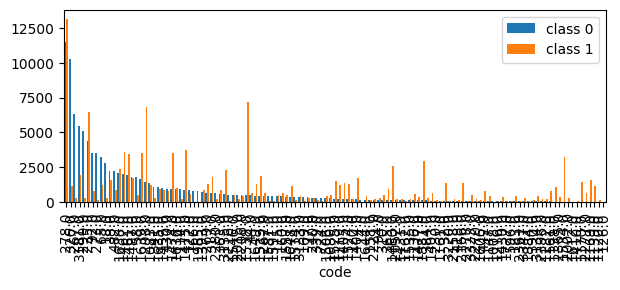

In [9]:
report_class_count_per_group(df_filter['flood'], df_filter['code'])

In [10]:
series_filter = df_filter[['code','flood']].value_counts()
series_filter

code    flood
278.0   1        13157
        0        11458
326.0   0        10299
1538.0  1         7180
298.0   1         6803
                 ...  
1120.0  0           12
766.0   1           10
1965.0  1            9
126.0   1            9
        0            9
Name: count, Length: 246, dtype: int64

In [11]:
n_img_per_cls = 30

# misturar o df para pegar imagens aleatorias de cada camera por classe
df_filter = df_filter.sample(frac=1, replace=False, random_state=42, ignore_index=True)

index_dict = {}
for cd in codes:
    # checar se a camera possui a quantidade de imagens por classe suficiente
    if (df_filter[(df_filter.code == cd)&(df_filter.flood == 0)].shape[0] >= n_img_per_cls) and \
        (df_filter[(df_filter.code == cd)&(df_filter.flood == 1)].shape[0] >= n_img_per_cls):
        
    # pegar os indices de cada imagem caso tenha a quantidade
        index_dict[cd] = [
            df_filter[(df_filter.code == cd)&(df_filter.flood == 0)].index[:n_img_per_cls],
            df_filter[(df_filter.code == cd)&(df_filter.flood == 1)].index[:n_img_per_cls]
        ]
len(index_dict.keys())

109

In [12]:
# criar um novo dataframe somente com os indices recebidos
df_final = pd.DataFrame(columns=df_filter.columns)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       0 non-null      object
 1   file_name  0 non-null      object
 2   file_path  0 non-null      object
 3   seen       0 non-null      object
 4   tags       0 non-null      object
 5   flood      0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes


In [13]:
for key in index_dict.keys():
    df_final = pd.concat([df_final, df_filter.iloc[index_dict[key][0]]], ignore_index=True, join="inner")
    df_final = pd.concat([df_final, df_filter.iloc[index_dict[key][1]]], ignore_index=True, join="inner")
print(len(df_final.code.unique()))
df_final.info()

109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   code       6540 non-null   float64
 1   file_name  6540 non-null   object 
 2   file_path  6540 non-null   object 
 3   seen       6540 non-null   object 
 4   tags       6540 non-null   object 
 5   flood      6540 non-null   object 
dtypes: float64(1), object(5)
memory usage: 306.7+ KB


C:\Users\Adm\AppData\Local\Temp\ipykernel_11120\2984404863.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_final, df_filter.iloc[index_dict[key][0]]], ignore_index=True, join="inner")


In [14]:
len(df_final[df_final.seen == True].code.unique())

109

In [15]:
codes = df_final.code.unique()

In [16]:
handpicked_train = [298,430,38,94,153,1147,313,1538,268,92,
                    
                    2396,1216,442,1460,115,32,363,1506,240,3135,
                    
                    326,299,169,2015,2280,1162,114,1535,1636,58,
                    
                    3323,1557,1182,278,1638,120,418,1727,1459,1080,
                    
                    596,267,1462,2166,3181,183,1430,1546,390,127,
                    
                    2216,1606,1514,2206,2365,1591,724,160,1487,1119, #0.4 < < 0.59
                    1477,561,3347,341,1884,1539,2221,158,230,2158,
                    
                    384,269,1587,1161,2052,3220,1474,273,2278,1475, #0.4 < < 0.69
                    339,1083,77,18,2361,65,1524,1639,2270,44,
                    
                    482,3133,136,262,1393,3134
                    ]
possible_train = [1431,235]
handpicked_train.extend(possible_train)

In [17]:
# separar as cameras em treino e validacao, usando como base as listas criadas anteriormente
train_codes = list(set(codes).intersection(handpicked_train))
len(train_codes)

96

In [18]:
set(handpicked_train) - set(codes)

{153, 268}

O df não possui essas câmeras que defini previamente para treino

In [19]:
test_codes = list(set(codes) - set(train_codes))
len(test_codes)

13

In [20]:
def train_test_split(code, train_list):
    if code in train_list:
        return 'train'
    return 'val'

In [21]:
df_final['split'] = df_final['code'].apply(lambda cd: train_test_split(cd, train_codes))
df_final.head()

,code,file_name,file_path,seen,tags,flood,split
0,1461.0,CODE1461 2023-04-08 13-16-13-6.jpg,comando/bolsao/94390/1461/CODE1461 2023-04-08 ...,True,[],0,val
1,1461.0,CODE1461 2023-04-08 13-56-07-3.jpg,comando/bolsao/94390/1461/CODE1461 2023-04-08 ...,True,[],0,val
2,1461.0,CODE1461 2023-08-27 05-00-10-3.jpg,polygons/comando/bolsao/0/1461/CODE1461 2023-0...,True,[],0,val
3,1461.0,CODE1461 2023-08-27 04-30-13-3.jpg,polygons/comando/bolsao/0/1461/CODE1461 2023-0...,True,[],0,val
4,1461.0,CODE1461 2023-08-27 05-10-15-9.jpg,polygons/comando/bolsao/0/1461/CODE1461 2023-0...,True,[],0,val


In [22]:
for splt in df_final.split.unique():
    print(f"{df_final[df_final.split == splt].shape[0]} {splt} images")

780 val images
5760 train images


In [23]:
dataset_dir = os.path.join(dataset_path,f'underperforming_cameras_{len(train_codes)}')
for splt in df_final.split.unique():
    
    split_dir = os.path.join(dataset_dir, splt)
    if not os.path.exists(split_dir):
        os.makedirs(split_dir)
    
    for fld in df_final.flood.unique():
        class_dir = os.path.join(split_dir, str(fld))
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        
    
df_final.to_csv(os.path.join(dataset_dir, 'images.csv'))

In [24]:
for splt in df_final.split.unique():
    n_rows = df_final[df_final.split == splt].shape[0]
    counter = 1
    for index, row in df_final[df_final.split == splt].iterrows():
    
        output_path = os.path.join(dataset_dir, row['split'])
        output_path = os.path.join(output_path, str(row['flood']))
        output_path = os.path.join(output_path, row['file_name'])
        shutil.copy(os.path.join(images_path, row['file_path']), output_path)
        
        print(f"Copied {counter}/{n_rows} {splt} images", end='\r')
        counter += 1
    print(f"Completed copying {n_rows} {splt} images")

Completed copying 780 val images
Completed copying 5760 train images
